In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/data-preprocessing/

# Load the dataset
df = pd.read_csv('bollywood.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

Mounted at /content/drive
/content/drive/My Drive/data-preprocessing
First few rows of the dataset:
   SlNo Release Date           MovieName ReleaseTime      Genre  Budget  \
0     1    18-Apr-14            2 States          LW    Romance      36   
1     2    04-Jan-13        Table No. 21           N  Thriller       10   
2     3    18-Jul-14  Amit Sahni Ki List           N     Comedy      10   
3     4    04-Jan-13    Rajdhani Express           N     Drama        7   
4     5    04-Jul-14        Bobby Jasoos           N     Comedy      18   

   BoxOfficeCollection  YoutubeViews  YoutubeLikes  YoutubeDislikes  
0               104.00       8576361         26622             2527  
1                12.00       1087320          1129              137  
2                 4.00        572336           586               54  
3                 0.35         42626            86               19  
4                10.80       3113427          4512             1224  


In [ ]:
# Display basic information about the dataset
print("\nBasic Information about the dataset:")
print(df.info())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Descriptive statistics
print("\nDescriptive statistics of the dataset:")
print(df.describe(include='all'))


Basic Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB
None

Missing values in the dataset:
SlNo                   0
Release Date           0
MovieName              0
ReleaseTime            0
Genre                  0
Budget                 0
BoxOffi


Distribution of numerical columns:


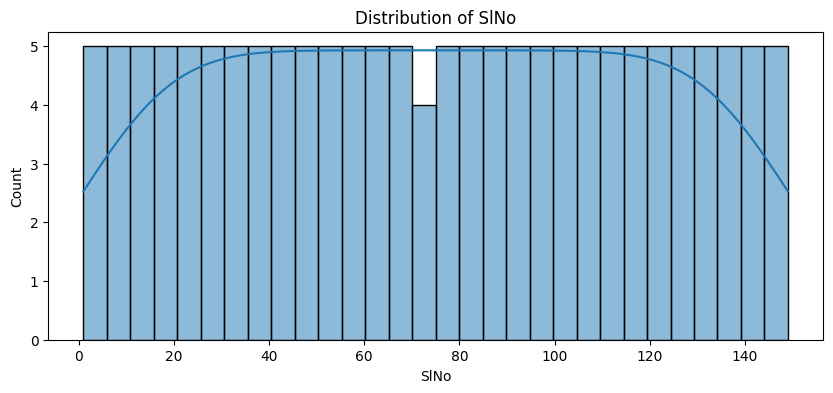

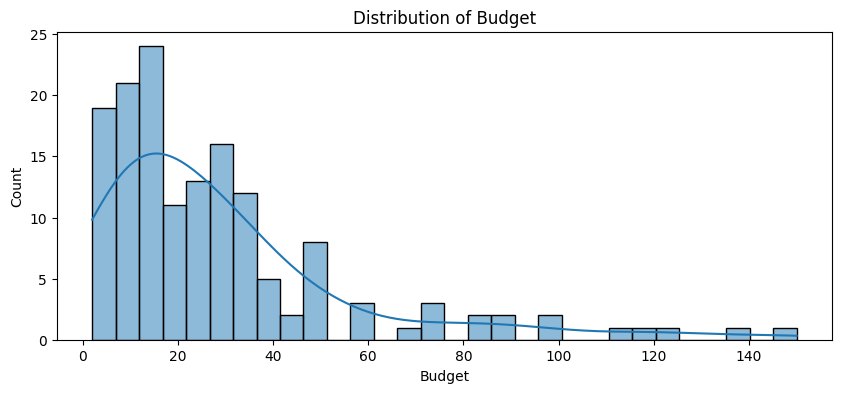

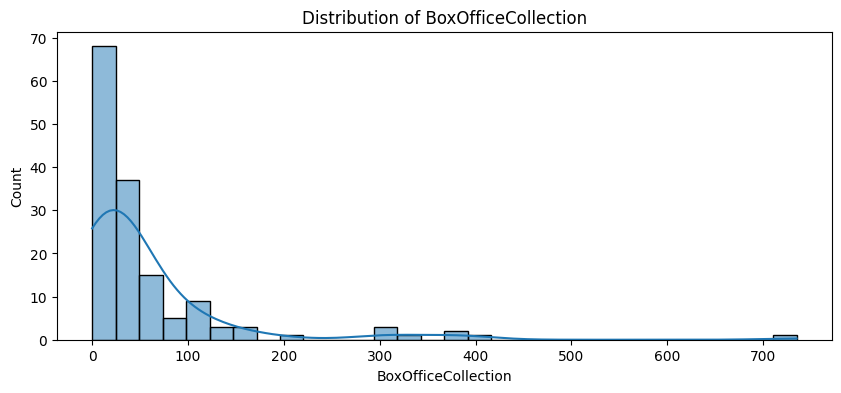

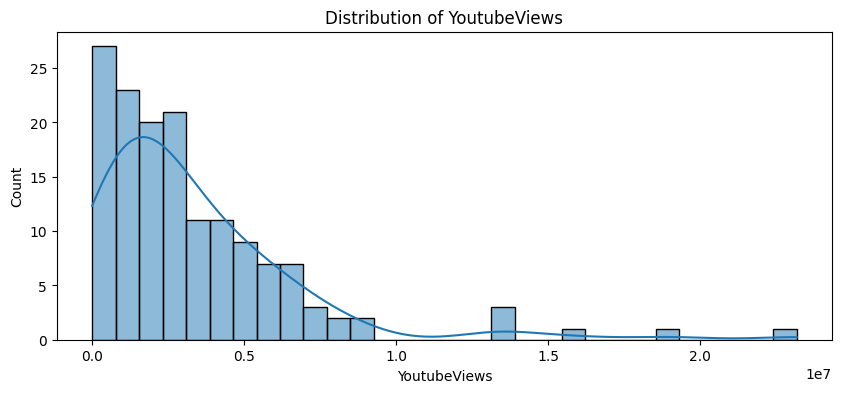

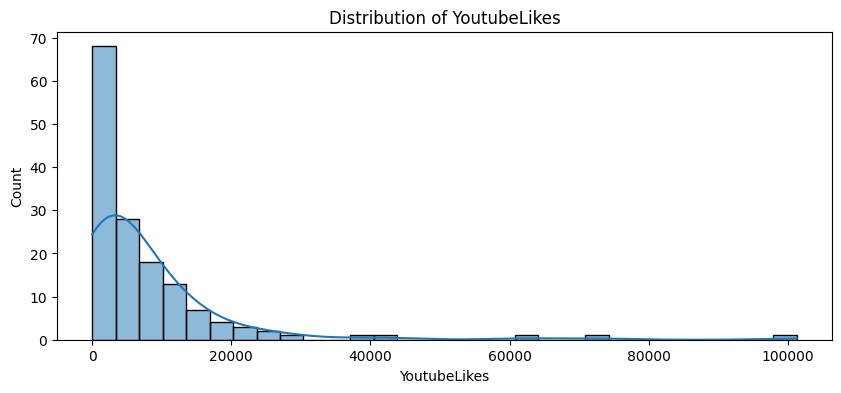

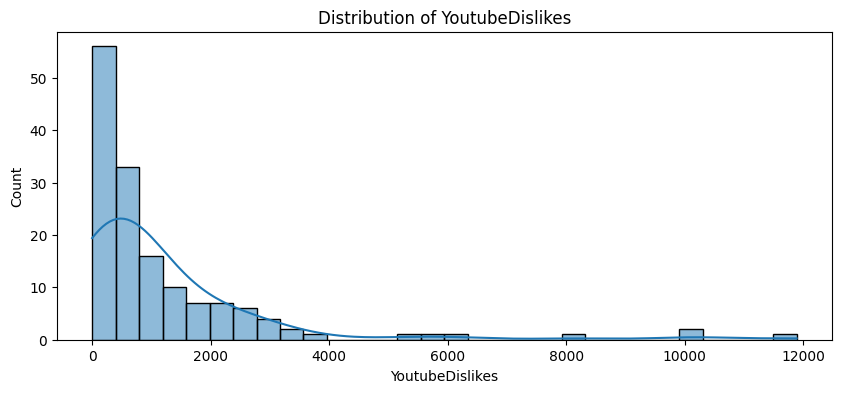

In [ ]:
# Data Cleaning
# Handling missing values (Example: filling missing values with mean or mode)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# Distribution of numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
print("\nDistribution of numerical columns:")
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()


Distribution of categorical columns:


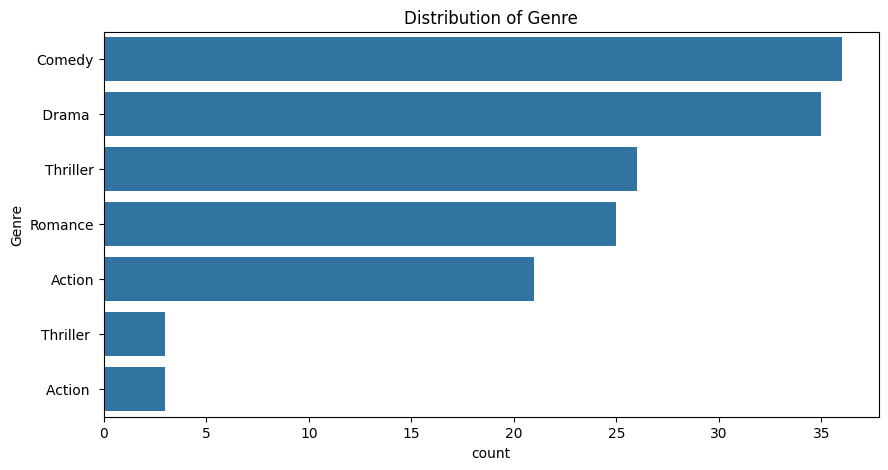

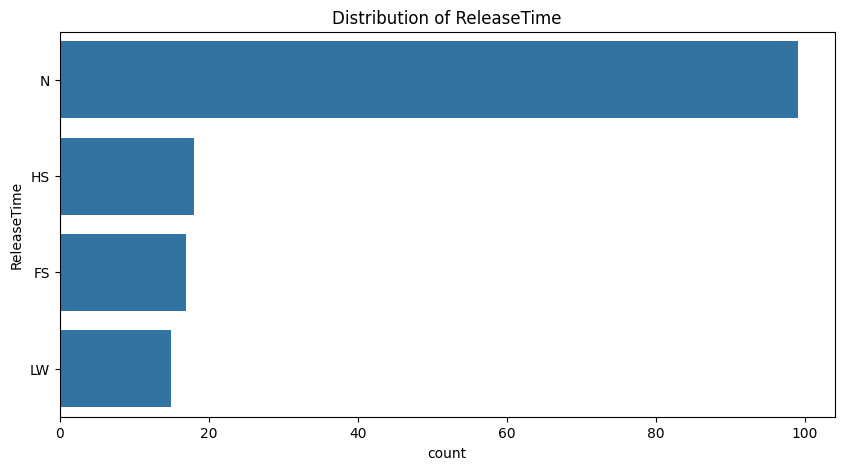

In [ ]:

# Distribution of categorical columns
selected_columns = ['Genre', 'ReleaseTime']
print("\nDistribution of categorical columns:")
for column in selected_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.show()



Correlation matrix:


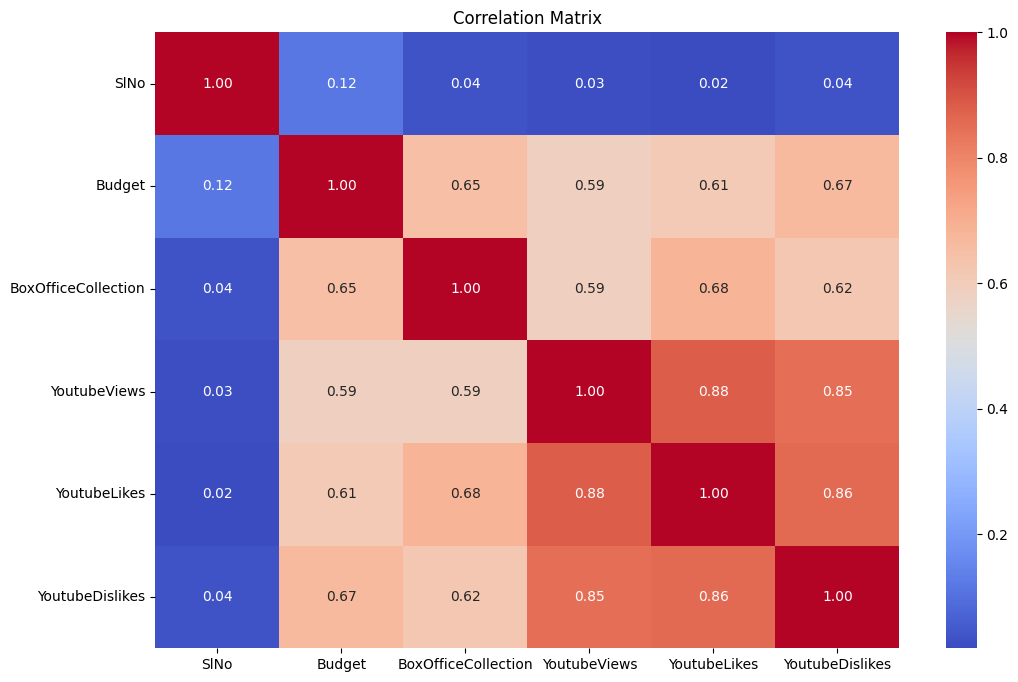

In [ ]:
# Selecting only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Correlation matrix for numerical columns
print("\nCorrelation matrix:")
corr_matrix = numerical_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Pairplot for numerical columns:


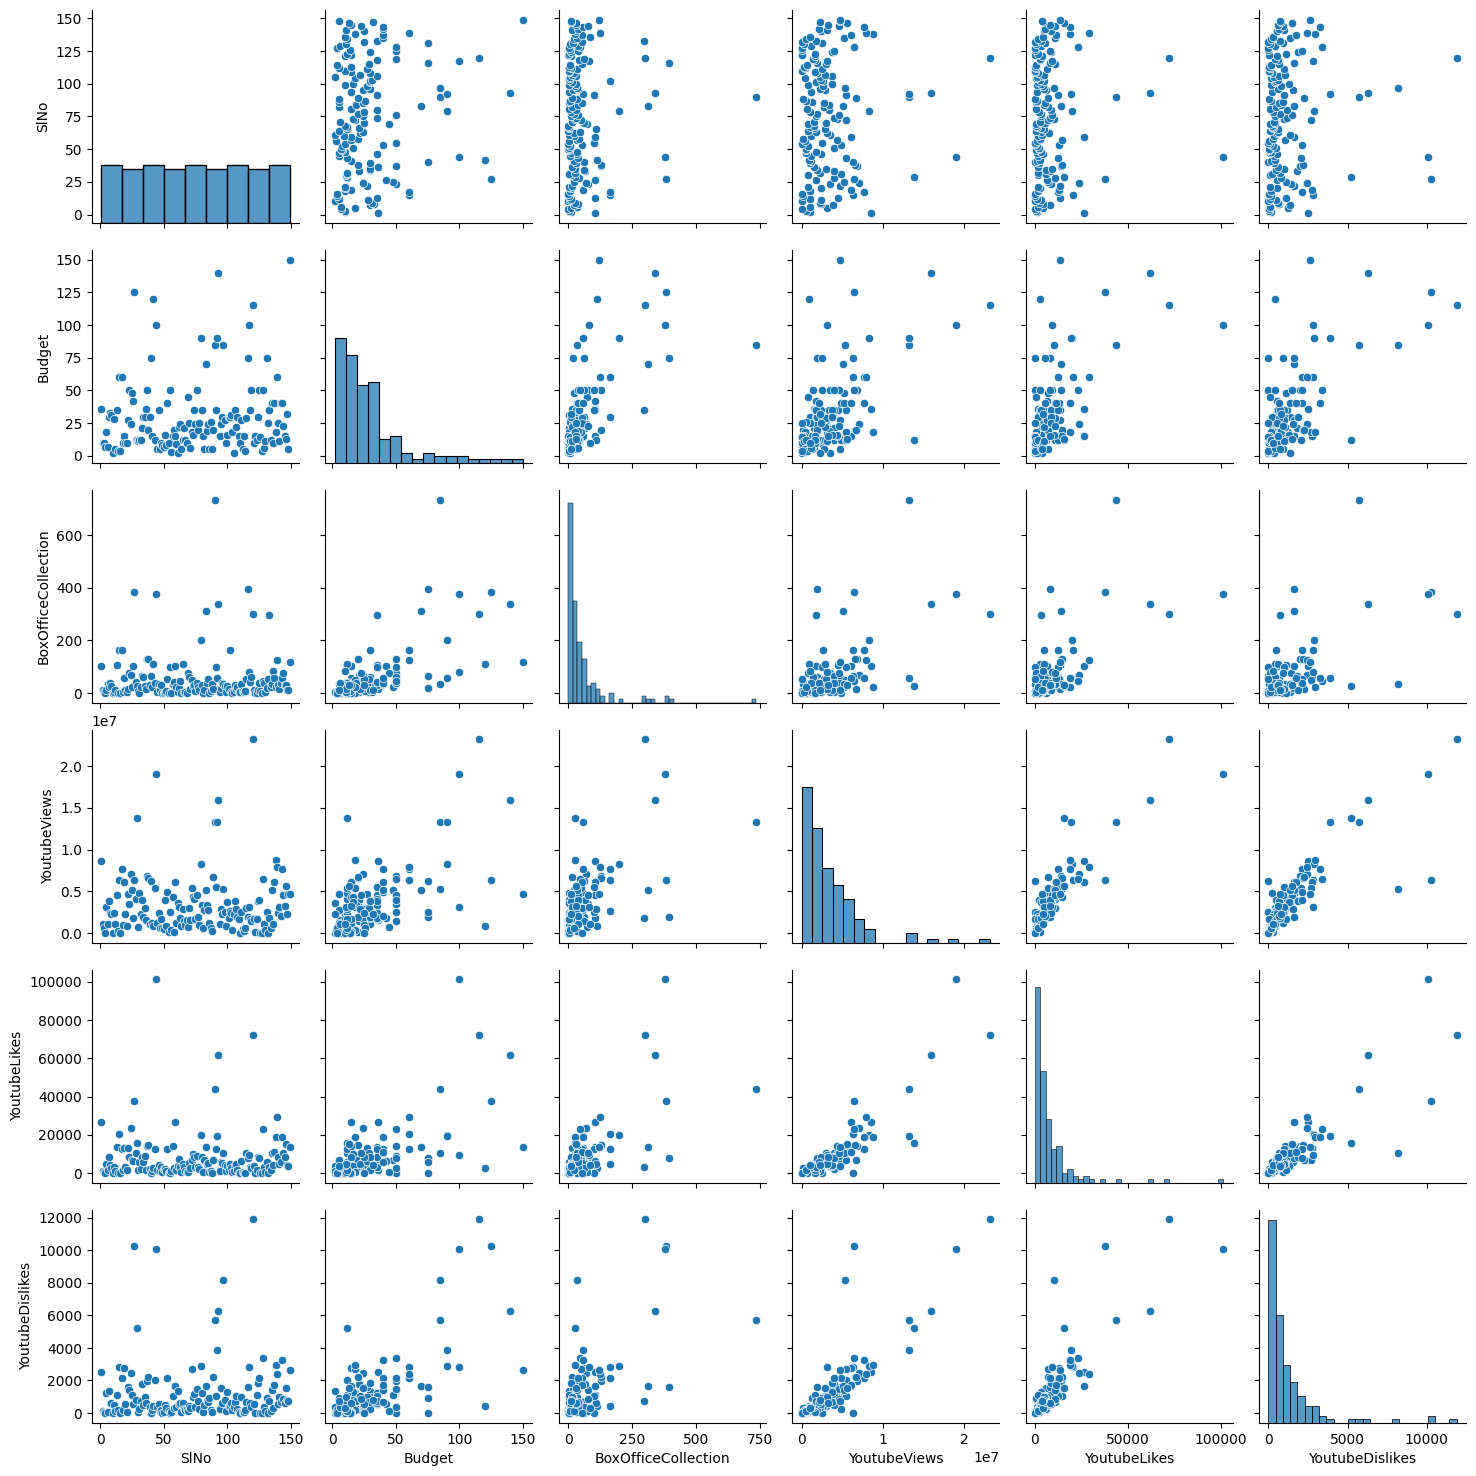

In [ ]:

# Pairplot for numerical columns
print("\nPairplot for numerical columns:")
sns.pairplot(df[numerical_columns])
plt.show()



Box plots for numerical columns to detect outliers:


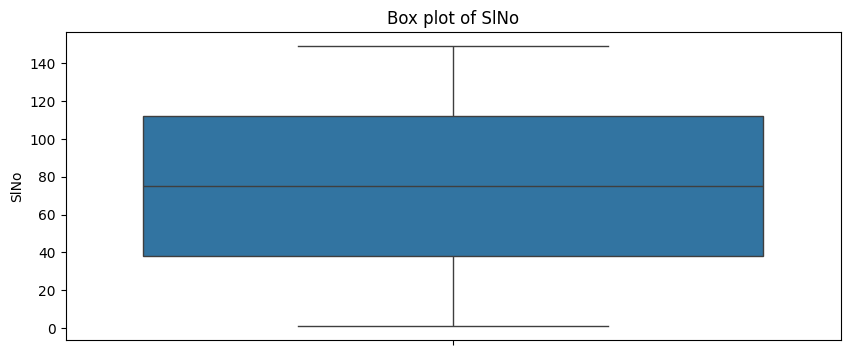

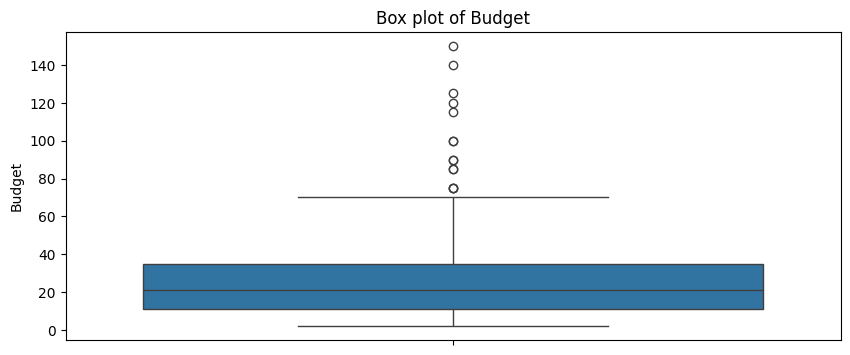

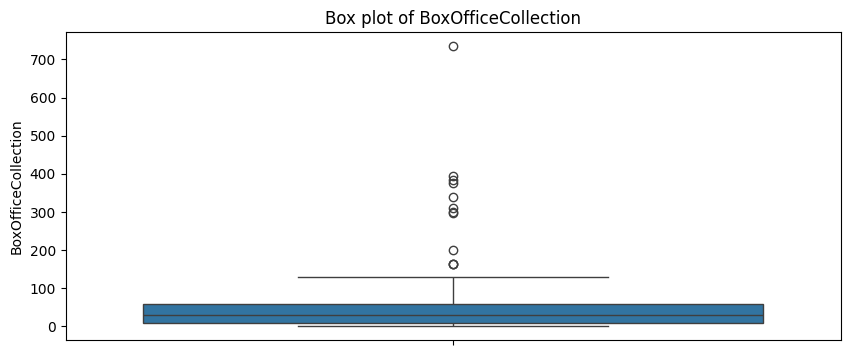

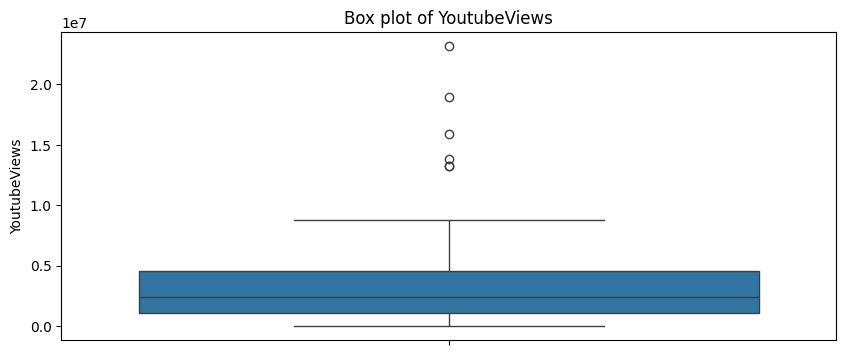

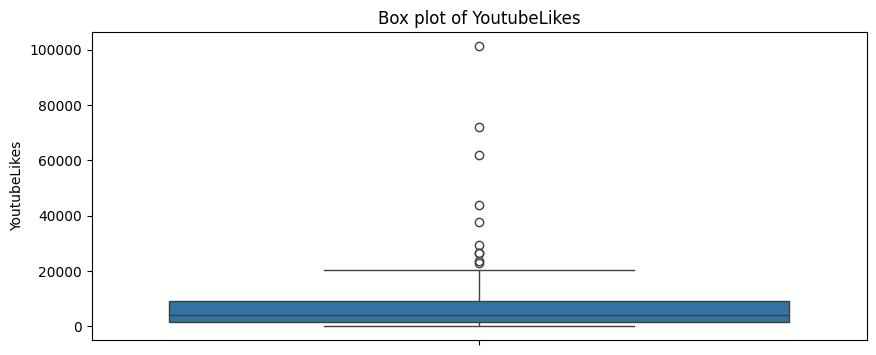

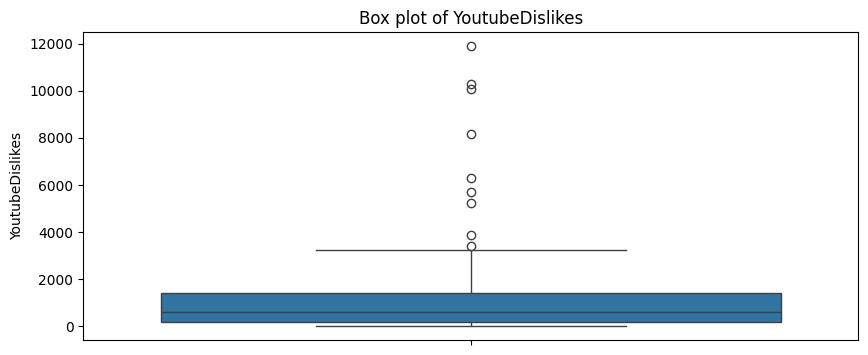

In [ ]:
# Box plots to detect outliers in numerical columns
print("\nBox plots for numerical columns to detect outliers:")
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

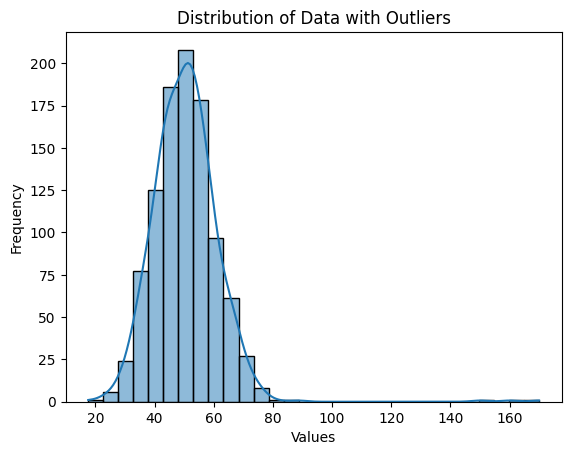

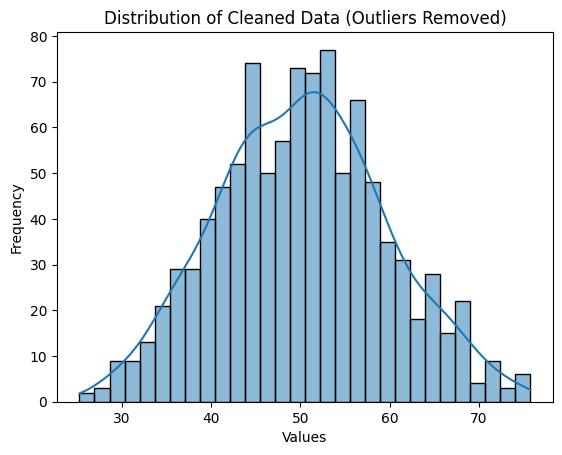

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate example data with outliers
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=1000)
data = np.append(data, [150, 160, 170])  # Adding outliers

# Visualize data distribution
sns.histplot(data, bins=30, kde=True)
plt.title('Distribution of Data with Outliers')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Identify outliers using IQR method
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
clean_data = data[(data >= lower_bound) & (data <= upper_bound)]

# Visualize cleaned data distribution
sns.histplot(clean_data, bins=30, kde=True)
plt.title('Distribution of Cleaned Data (Outliers Removed)')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()
